# Investigating difference between firstUsedDate and registrationDate

In [1]:
#We'll start by importing the usual packages we use to read the data.
import pandas_gbq
from google.oauth2 import service_account
import os
# from google.cloud import bigquery
import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
from tqdm import tqdm
import pandas as pd

In [2]:
# Credentials for BigQuery
credentials = service_account.Credentials.from_service_account_file('rugged-baton-283921-5706f65c85fe.json')

In [11]:
sql = """
SELECT registration, TIMESTAMP_DIFF(firstUsedDate, registrationDate, DAY) as diff
FROM `rugged-baton-283921.mots.vehicles`
WHERE firstUsedDate != registrationDate;
"""

In [12]:
df = pandas_gbq.read_gbq(sql, project_id='rugged-baton-283921', credentials = credentials, progress_bar_type='tqdm')

Downloading: 100%|██████████████████████████████████████████████████████| 2376003/2376003 [00:43<00:00, 55045.18rows/s]


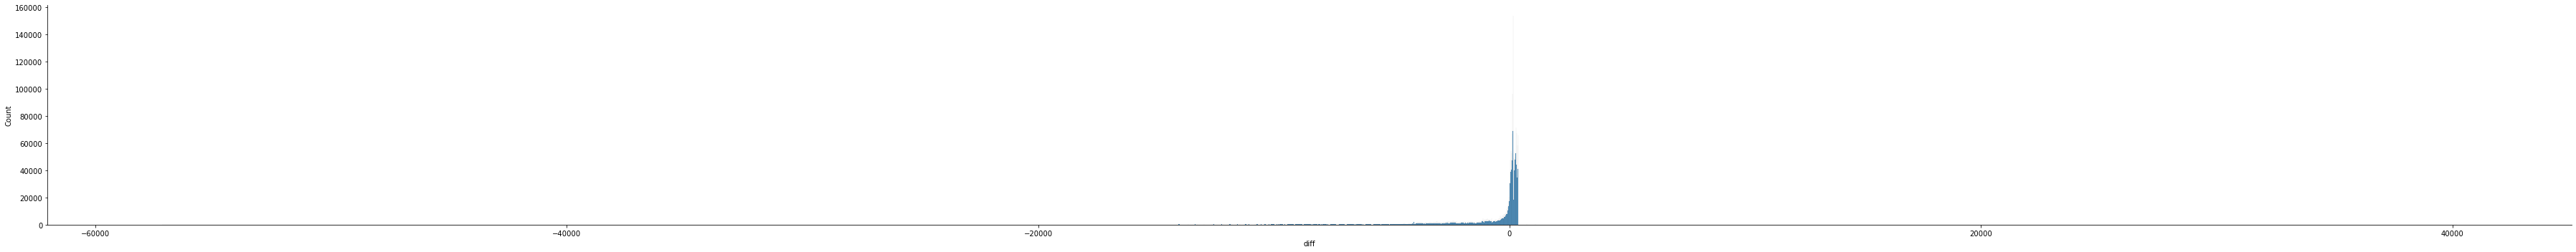

In [18]:
sns.displot(data = df, x = 'diff', aspect=10)

<AxesSubplot:xlabel='diff'>

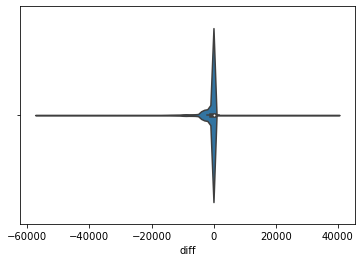

In [9]:
sns.violinplot(data = df, x='diff', bins=100)

In [14]:
df.describe()

,diff
count,2.376003e+06
mean,-1.004686e+03
std,3.098778e+03
min,-5.715200e+04
25%,-7.160000e+02
50%,9.100000e+01
75%,2.140000e+02
max,4.017700e+04


In [20]:
df.head()

,registration,diff
0,474DBJ,-31
1,843CDL,-228
2,750GYU,2557
3,CSM921L,-431
4,D763YWV,-706


In [21]:
df.sort_values('diff').head(20)

,registration,diff
333285,869YUB,-57152
369635,Q914OAL,-42094
841869,Q638LBW,-42063
422784,Q891DSO,-42063
1920073,Q511LBW,-42063
422781,Q476LBW,-42063
593773,Q840HCY,-42057
1595117,Q710LBW,-42034
1980637,Q223LBW,-42034
380062,Q155LBW,-42034
